# Prueba de permutaciones

## Planteamiento del problema

El test de permutaciones es un procedimiento robusto que se utiliza para comparar las medias de dos poblaciones. Aunque disponemos del test $t$ de Student para realizar este contraste, es bien sabido que descansa sobre la hipótesis de que las dos poblaciones a comparar son normales. Si no cumplen esta condición, y la muestra es grande, podemos utilizar la prueba asintótica. Si hay dudas sobre la normalidad de las poblaciones, o no estamos seguros de si la muestra es suficientemente grande para utilizar los resultados del Teorema Central del Límite, nos viene bien un test que no dependa de estas exigencias.

El test de permutaciones es una técnica de remuestreo que no exige condiciones a la población y que utiliza la distribución empírica del estadístico de contraste para calcular su $p$-valor.

Los datos se refieren a la longitud del caparazón de cierta especie de tortuga. Disponemos de una muestra extraída de entre los machos y otra de entre las hembras.

In [1]:
# Longitudes para los machos
mach <- c(93,94,96,101,102,103,104,106,107,112,113,114,
          116,117,117,119,120,120,121,125,127,128,131,135)

# Longitudes para las hembras
hemb <- c(98,103,103,105,109,123,123,133,133,133,134,136,
          138,138,141,147,149,153,155,155,158,159,162,177)

# Todos juntos conforman la población
pobl <- c(mach, hemb)

Las dos muestras, juntas, conformarán la población sobre la que hagamos un buen número de muestras. La variable `pobl` contiene todas las observaciones de uno de los sexos, seguidas de las observaciones del otro sexo.

Almacenamos los tamaños muestrales de los tres vectores que tenemos definidos hasta ahora.


In [2]:
n <- length(mach)
m <- length(hemb)
tot <- n + m

Queremos hacer el contraste
$$
\begin{array}{ll}
H_0: & \mu_M = \mu_H\\
H_1: & \mu_M \neq \mu_H,
\end{array}
$$
para lo que utilizaremos como estadístico de contraste la diferencia de medias $d = \mu_M - \mu_H$. Calculamos entonces la diferencia de medias de las dos poblaciones, $d_0$. 


In [3]:
d0 <- mean(mach) - mean(hemb)
d0

[1] -22.66667

## La técnica del remuestreo

Ahora es cuando empieza a funcionar la lógica del remuestreo. Si damos por cierta la hipótesis nula $H_0$ de que ambas poblaciones tienen igual media, reasignamos aleatoriamente las mediciones a cada uno de los sexos y volvemos a calcular las diferencias de las medias de los nuevos machos y hembras, los resultados deberían ser similares a $d_0$.

Cada una de estas reasignaciones la podemos interpretar como una permutación del vector pobl o como la extracción de una muestra sin reemplazo de tamaño `tot`.


In [4]:
# tamaño del remuestreo
B <- 10000

# contenedor de las diferencias calculadas
# para cada permutación.
d <- c()

for (i in 1:B) {
    # primero permutamos
    s <- sample(pobl, tot, replace = FALSE, prob = NULL)

    # luego calculamos medias de los primeros n individuos,
    # los machos, y los m últimos, las nuevas hembras
    d[i] <- mean(head(s, n)) - mean(tail(s, m))
    }

# vemos las cinco primeras diferencias
head(d,5)

[1] 3.250000 7.916667 7.500000 2.916667 2.083333

Representamos el histograma de las distancias, que nos puede servir como aproximación a la función de densidad de la distribución empírica, y le añadimos la posición de la diferencia $d_0$ real entre machos y hembras.

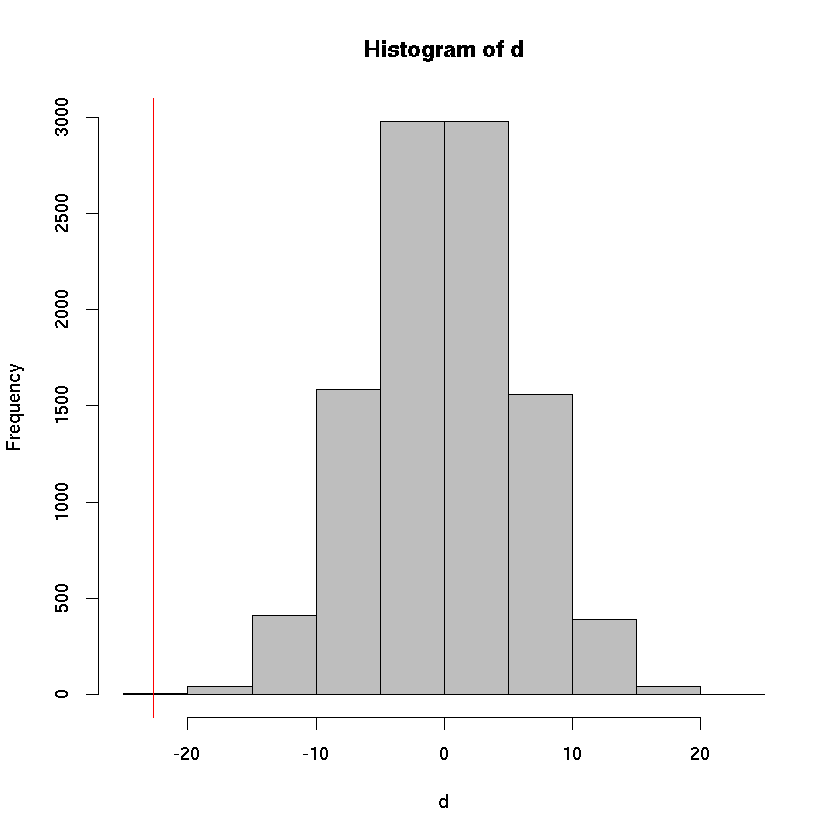

In [5]:
hist(d, col = "gray")
abline(v=d0, col="red")

Vemos que la línea roja que marca la posición de $d_0$ queda en un lugar muy marginal. Si hacemos el recuento de la proporción de diferencias que, en valor absoluto, son mayores que $d_0$, tenemos la probabilidad crítica del contraste, 
$$
p_v = \frac{\#\{d: |d| \geq |d_0|\} + 1}{B+1},
$$
siendo $B$ el tamaño del remuestreo.

In [6]:
# Cálculo del p-valor
abs.d0 <- abs(d0)
abs.d <- abs(d)
pv <- (length(abs.d[abs.d > abs.d0]) + 1) / (B + 1)

# resultados
list('d0' = d0, "p-valor"=pv)

$d0
[1] -22.66667

$`p-valor`
[1] 0.00029997

La diferencia de medias es muy significativa; más grande en la hembras que en los machos.